<h1 align="center">Feature Selection</h1>

![feature_selection](../images/feature_selection.png)

## Program so far

***

- Basics of Python
- Descriptive and Inferential Statistics
- Linear Regression
- L1/L2 Regularization
- Basic data cleaning and Preprocessing
- Feature extraction and Feature engineering

# Table of contents
***

- Importance of Feature Selection
**Univariate**
- Variance Threshold

**Multivariate**
- Pearson
- Select K Best
- f_regression
- MIC
- RFE

**What is to be covered later?**


- Filter Methods
- Wrapper Methods
- Embedded Methods
- Difference between Filter and Wrapper methods
- Walk-through example

*****

# John in a fix again..
***
* So John was content from what he learned on Feature extraction and Feature engineering, so he planned to go through for building a model.

* So he looked at the feature and looked puzzled, as he saw some feature got deleted and other got added.

* His brain was again in chaos as he thought he is doing well in building a model.

## Jay to the rescue!!
***

* John called up Jay, who asked him to calm down and go for a feature selection, decide whether which feature is important and which is not important while building a model.

** John got really happy to find a solution, but just for a second. Next, he realized he did not know what feature selection is. Jay figured this out from his blank expressions. Weird John!! However, Jay went on to explain what feature selection is. **

![I_have_no_idea](../images/afaf75eb7f7d985123e90b966a7c055c1941f4a6f7098885c4558a9491eeb1ed.jpg)

## So what is Feature Selection?
***
* In machine learning and statistics, feature selection, also known as variable selection, attribute selection or variable subset selection, is the process of selecting a subset of relevant features (variables, predictors) for use in model construction.

## Importance of Feature Selection
***
* This becomes even more important when the number of features are very large.
* You need not use every feature at your disposal for creating an algorithm. 
* You can assist your algorithm by feeding in only those features that are really important.

## Where to use feature selection?
***
- It enables the machine learning algorithm to train faster.
- It reduces the complexity of a model and makes it easier to interpret.
- It improves the accuracy of a model if the right subset is chosen.
- It reduces overfitting.

# Type of Feature Selection
***
Jay helped John identify different types of feature selection:-

* Univariate Feature Selection
* Multivariate Feature Selection


<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />
## Univariate Feature Selection (1/2)
***
* Univariate feature selection methods examine -
    - the predictive power of individual features
    - the strength of the relationship of the feature with the response variable
* These methods are simple to run and understand
* They also prove to be good for gaining a better understanding of data, and can often be the starting point for multivariate feature selection methods

<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />
## Univariate Feature Selection (2/2)
***
* We can look at the interaction between the top variables instead of all possible combinations
* These methods are not necessarily good for optimizing the feature set for better generalization

### Method 1 : Removing features with low variance (1/2)
***
* One of the most basic, yet a very powerful feature selection technique
* We want to remove all features whose variance doesn't meet some threshold
* For example, a feature with 0 variance means it has the same value for every sample. This means that such a feature would not bring any predictive power to the model. 
* Hence, we should remove all such zero-variance features


### Removing features with low variance (2/2)
***
* John thought, if he had a dataset with boolean features, and he wanted to remove all features that were either one or zero (on or off) in more than 80% of the samples. How would he do that?

* Answer : Boolean features are Bernoulli random variables, and the variance of such variables is given by  Var(x)=p(1−p)

* *from sklearn.feature_selection import VarianceThreshold*   is a handy method to remove such features


In [1]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

### Method 2 : Pearson Correlation
***
* Another method that Jay suggested was Pearson Correlation
* The population correlation coefficient  $ρ_{(X,Y)}$  between two random variables  X and  Y with expected values  $μ_X$  and  $μ_Y$  and standard deviations  $σ_X$ and  $σ_Y$.
* It is used as a measure for quantifying linear dependence between two continuous variables X and Y. Its value varies from -1 to +1. Pearson’s correlation is given as:
![FS3.JPG](../images/FS3.JPG)
* where E is the expected value operator, cov means covariance, and corr is a widely used alternative notation for the correlation coefficient.

### Pearson Correlation
***
* One of the simplest method for understanding a feature's relation to the response variable is Pearson correlation coefficient, which measures linear correlation between two variables
* Scipy's Pearson's method computes both the correlation and p-value for the correlation, roughly showing the probability of an uncorrelated system creating a correlation value of this magnitude.

In [2]:
from scipy.stats import pearsonr
import pandas as pd
import numpy as np

iowa = pd.read_csv('../data/house_prices_multivariate.csv')

X = iowa.iloc[:,:-1]
y = iowa.iloc[:,[-1]]

for i in X.columns:
    print(pearsonr(X[i],y.iloc[:,0]))

(0.21333063767622742, 1.1737586722804399e-15)
(0.25292145909045383, 1.4393180302090238e-21)
(0.78722782608733488, 2.1445443005885551e-291)
(-0.095277741322441101, 0.00039562906150161819)
(0.5075840635608162, 3.4952090879764857e-91)
(0.50543406085945486, 2.6380742157957248e-90)
(0.46313912358889814, 2.9820001700080498e-74)
(0.37556275564606306, 1.9661359169716295e-47)
(-0.023242905914850134, 0.38843634048536457)
(0.21313492312249654, 1.2477039987503075e-15)
(0.60358340521938458, 1.2138812661326489e-137)
(0.59493527015311187, 8.4434426924660832e-133)
(0.31333558982340071, 8.586805601804292e-33)
(-0.0083643951963062197, 0.75630648727034699)
(0.70817211395401802, 2.0881561463430674e-210)
(0.22598801206023669, 1.9869617037193285e-17)
(-0.02565087567084923, 0.34118054695789191)
(0.5565503021306587, 5.5318538843289583e-113)
(0.27072120770545072, 1.3703337439160485e-24)
(0.1646549492106765, 7.7032133988274317e-10)
(-0.13557396150699427, 4.3422728354803543e-07)
(0.53830912413744747, 1.931915358

### Pearson Correlation
***
* With code demo:

* With smaller amount of noise, the correlation is relatively strong, with a very low p-value

* However, for the noisy comparison, the correlation is very small and p-value is very high

* The high p-value means that it is very likely to observe such correlation on a dataset of this size purely by chance.

### Pearson Correlation: 
***
* Pearson correlation is the ratio of co-variance of two variables to a product of variance (of the variables)
* The correlation coefficient has values between -1 to 1
    - A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
    - A value closer to 1 implies stronger positive correlation
    - A value closer to -1 implies stronger negative correlation


### Pearson Correlation
***
**Correlation is not Transitive:**

* Let  X,  Y and  Z be random variables.
    - ρX,Y > 0.8
    - ρY,Z > 0.7
Can we say  ρX,Z  will be strongly positive?


### Pearson Correlation
***
**Correlation is not Transitive:**

* Not really! 
* ρX,Z will be positive if ρX,Y and ρY,Z are very close to 1
* Mathematically speaking:
![FS4.JPG](../images/FS4.JPG)

### Pearson Correlation
***
**Sensitivity to Outliers:**
Once again:
![FS5.JPG](../images/FS5.JPG)
* Means themselves are sensitive to outliers
* The correlation itself will be sensitive to outliers as well

### Pearson Correlation
***
**Correlation doesn't capture nonlinear relationships**
 
* One obvious drawback of Pearson correlation as a feature ranking mechanism is that it is only sensitive to a linear relationship.
* If the relation is non-linear, Pearson correlation can be close to zero even if there is a 1-1 correspondence between the two variables.
* For example, correlation between x and $x_2$ is zero, when x is centered on 0.

### Pearson Correlation
***
**Correlation doesn't capture nonlinear relationships**
 
* In the image in the next slide, there are several sets of (x, y) points, with the Pearson correlation coefficient of x and y for each set.
* Note that the correlation reflects the noisiness and direction of a linear relationship (top row), but not the slope of that relationship (middle), nor many aspects of nonlinear relationships (bottom).


### Pearson Correlation
***
**Correlation doesn't capture nonlinear relationships**

![FS6.JPG](../images/FS6.JPG)

### Pearson Correlation
*** 
![FS7.JPG](../images/FS7.JPG)

#### Now that John understood Pearson's Correlation, he wanted to get deeper into Feature Extraction in Python.

<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />
## Sklearn for Feature Selection
***
* Scikit-learn has a wide variety of functions for eliminating features based information-criteria. 
* For performing univariate feature selection, we need to specify two parameters
    - Selection criteria
    - Metric to be used for selection



**Sklearn for Feature Selection**
##### Selection Criteria
* SelectKBest: Removes all but the k highest scoring features
* SelectPercentile: Removes all but a user-specified highest scoring percentage of features


**Sklearn for Feature Selection**
##### Selection Criteria
* There are more advanced techniques you can explore:

*GenericUnivariateSelect*: Allows to perform univariate feature selection with a configurable strategy. This allows to select the best univariate selection strategy with hyper-parameter search estimator.

**Sklearn for Feature Selection**
##### Regression
* **f_regression**: The methods based on F-test estimate the degree of linear dependency between two random variables.
* **Mutual_info_regression**:Mutual information methods can capture any kind of statistical dependency, but being nonparametric, they require more samples for accurate estimation


** Sklearn for Feature Selection**
##### Selection Metric
##### Classification

* **chi2**: Based on Chi Squared
* **F_classif**: Based on f-test
* **Mutual_info_classif**: Based on Mutual Information Theory


##### Multiple Inclusion Criterion (MIC)

* MIC modifies stepwise feature selection to more easily select features that are helpful across multiple tasks.
* Our approach allows each feature to be added to none, some, or all of the tasks.
* MIC is most beneficial for selecting a small set of predictive features from a large pool of potential features, as is common in genomic and biological datasets. 

**Recursive Feature Elimination (RFE)**

* The Recursive Feature Elimination (RFE) method works by recursively removing attributes and building a model on those attributes that remain.
* It uses an external estimator that assigns weights to features (for example, the coefficients of a linear model) to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.


** Recursive Feature Elimination (RFE)**

* It is a greedy optimization algorithm which aims to find the best performing feature subset.

* It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. 

* It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.

In [3]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# create a base classifier used to evaluate a subset of attributes
model = LinearRegression()

X, y = iowa.iloc[:,:-1], iowa.iloc[:,-1]
# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(X, y)

# summarize the selection of the attributes
print(rfe.support_)

print(rfe.ranking_)

[False False  True False False False False False False False False False
 False False False False False False False False  True False False False
  True False False False False False False False False False]
[12 31  1  8 10 17 18 25 28 29 24 14 15 27 22  3  5  2 13  7  1  6  4 11  1
 23 20 30 26 21 16 19 32  9]


**Model Based Feature Selection**

* Certain models can be used as feature selection mechanisms because their inner workings involves ordering or ranking of features.
* We have already gone through such algorithms:
* Brain Teaser:
     - What are such algorithms?



**Model Based Feature Selection**
* Here are a few algorithms which help us select feature selection:
    - L1 regularized linear regression
    - Decision Trees
    - Random Forests
    - Gradient Boosting Machines


#### Model Based Feature Selection
***
* Here are a few algorithms which help us select feature selection:
    - L1 regularized linear regression
    - Decision Trees
    - Random Forests
    - Gradient Boosting Machines


### Various methodologies and techniques  to subset  feature space and make models perform better and efficiently.
***
John got a good measure of feature selection and was more confident than ever on it. He started reading more on techniques to make his models more efficient. This is what he found out-

<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />
##  Filter Methods
***
![Filter_1.png](../images/Filter_1.png)

* Filter methods are generally used as a preprocessing step. The selection of features is independent of any machine learning algorithms. 
* Instead, features are selected on the basis of their scores in various statistical tests for their correlation with the outcome variable. The correlation is a subjective term here.
* For basic guidance, you can refer to the following table for defining correlation co-efficients.

![FS1.png](../images/FS1.png)

##  Filter Methods
***
**Pearson’s Correlation**: It is used as a measure for quantifying linear dependence between two continuous variables X and Y. Its value varies from -1 to +1. Pearson's correlation is given as:
![FS2.png](../images/FS2.png)

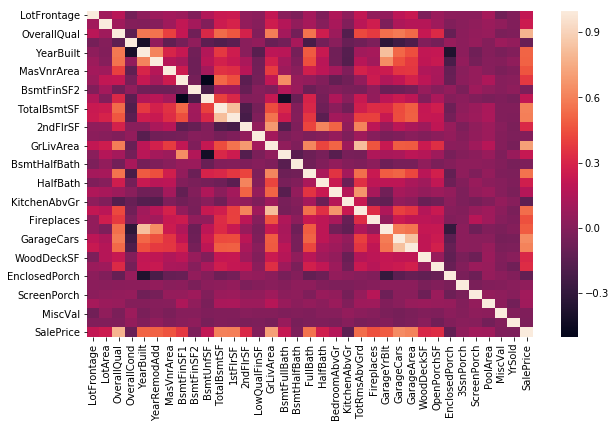

In [4]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

plt.figure(figsize=(10,6))
sns.heatmap(iowa.corr())

##  Filter Methods
***
**LDA**: Linear discriminant analysis is used to find a linear combination of features that characterizes or separates two or more classes (or levels) of a categorical variable.

##  Filter Methods
***
**ANOVA**: ANOVA stands for Analysis of variance. It is similar to LDA except for the fact that it is operated using one or more categorical independent features and one continuous dependent feature. It provides a statistical test of whether the means of several groups are equal or not.

##  Filter Methods
***
**Chi-Square**: It is a is a statistical test applied to the groups of categorical features to evaluate the likelihood of correlation or association between them using their frequency distribution.

### How do Filter Methods help with Multicollinearity
***
One thing that should be kept in mind is that filter methods do not remove multicollinearity. So, one must deal with multicollinearity of features as well before training models for his/her data.

<img src="../images/Concept-Alert.png" alt="Concept-ALert" style="width: 100px;float:left; margin-right:15px"/>
<br />
## Wrapper Methods
***
![Wrapper_1.png](../images/Wrapper_1.png)

## Wrapper Methods
***
* In wrapper methods, we try to use a subset of features and train a model using them.
* Based on the inferences that we draw from the previous model, we decide to add or remove features from your subset.
* The problem is essentially reduced to a search problem. These methods are usually computationally very expensive.
* Some common examples of wrapper methods are forward feature selection, backward feature elimination, recursive feature elimination, etc.

## Wrapper Methods
***
**Forward Selection**: Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model

## Wrapper Methods
***
**Backward Elimination**: In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.

<img src="../images/Concept-Alert.png" alt="Concept-ALert" style="width: 100px;float:left; margin-right:15px"/>
<br />
## Embedded Methods
***
![Embedded_1.png](../images/Embedded_1.png)

* Embedded methods combine the qualities’ of filter and wrapper methods. It’s implemented by algorithms that have their own built-in feature selection methods.
* Some of the most popular examples of these methods are LASSO and RIDGE regression which have inbuilt penalization functions to reduce overfitting.
    - Lasso regression performs L1 regularization which adds penalty equivalent to absolute value of the magnitude of coefficients.
    - Ridge regression performs L2 regularization which adds penalty equivalent to square of the magnitude of coefficients.
* We already have learned how these algorithm works.Other examples of embedded methods are Regularized trees, Memetic algorithm, Random multinomial logit.

## Difference between Filter and Wrapper methods 
***
The main differences between the filter and wrapper methods for feature selection are:
* Filter methods measure the relevance of features by their correlation with dependent variable while wrapper methods measure the usefulness of a subset of feature by actually training a model on it.
* Filter methods are much faster compared to wrapper methods as they do not involve training the models. On the other hand, wrapper methods are computationally very expensive as well.
* Filter methods use statistical methods for evaluation of a subset of features while wrapper methods use cross validation.

## Difference between Filter and Wrapper methods 
***
* Filter methods might fail to find the best subset of features in many occasions but wrapper methods can always provide the best subset of features.
* Using the subset of features from the wrapper methods make the model more prone to overfitting as compared to using subset of features from the filter methods.

# Walkthrough example
Good, Moving forward John asked one example with Iowa dataset ...

So, Jay give an example with RandomForest ( about the model we will be learning later)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier


# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)


In [5]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [6]:
importances = forest.feature_importances_
importances

array([ 0.17763201,  0.29590176,  0.20835127,  0.04712087,  0.04461413,
        0.04391181,  0.04630262,  0.04557492,  0.04601349,  0.04457711])

In [7]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
std

array([ 0.06051993,  0.04230464,  0.06436972,  0.01396762,  0.01401046,
        0.01384792,  0.01307601,  0.01350302,  0.013044  ,  0.01475966])

In [8]:
indices = np.argsort(importances)[::-1]
indices

array([1, 2, 0, 3, 6, 8, 7, 4, 9, 5])

In [9]:

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 1 (0.295902)
2. feature 2 (0.208351)
3. feature 0 (0.177632)
4. feature 3 (0.047121)
5. feature 6 (0.046303)
6. feature 8 (0.046013)
7. feature 7 (0.045575)
8. feature 4 (0.044614)
9. feature 9 (0.044577)
10. feature 5 (0.043912)


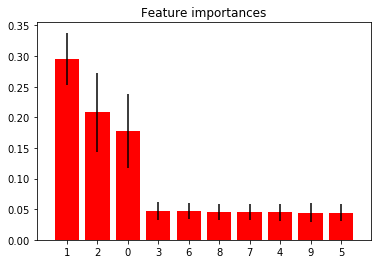

In [10]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

<img src="../images/Recap.png" alt="Recap" style="width: 100px;float:left; margin-right:15px"/>
<br />
# In-session Recap Time
***
* Feature Selection
* Univariate Feature Selection
* Multivariate Feature Selection
* Filter Methods
* Wrapper Methods
* Embedded Methods

# Thank You
***
### Next Session: Logistics Regression
For more queries - Reach out to academics@greyatom.com 